<a href="https://colab.research.google.com/github/aayushibeniwal/Introduction-to-TensorFlow-for-Artificial-Intelligence-Machine-Learning-and-Deep-Learning/blob/main/NN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

The [Fashion MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) is a collection of grayscale 28x28 pixel clothing images. Each image is associated with a label as shown in this table⁉

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

This dataset is available directly in the [tf.keras.datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) API and you load it like this:

In [ ]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

Calling `load_data()` on this object will give two tuples with two lists each. These will be the training and testing values for the graphics that contain the clothing items and their labels.


In [ ]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


  Let's print a training image (both as an image and a numpy array)

LABEL: 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

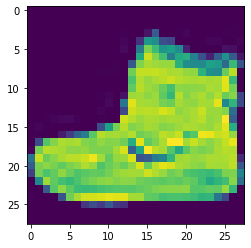

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 0

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

LABEL: 2

IMAGE PIXEL ARRAY:
 [[  0   0   0   1   0   0   0   0   0  34 148 202 107  84 162 198  90  26   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  21 107 166 168 152 204 238 248 237 190 142 178 158  98  17   0   0   0   0   0   0   0]
 [  0   0   0   1   0  55 188 140 131 121 119 116 146 157 132 115 136 125 140 143 181  51   0   0   0   0   0   0]
 [  0   0   0   0   0 167 134 113 130 134 140 132 125 125 131 135 130 133 131 115 135 163   6   0   0   0   0   0]
 [  0   0   0   0  58 148 133 124 134 128 135 128 133 130 133 137 138 130 124 130 133 147  82   0   1   0   0   0]
 [  0   0   0   0  86 148 158 139 124 120 131 134 132 134 124 134 132 137 126 137 136 146 114   0   0   0   0   0]
 [  0   0   0   0 112 141 174 143 117 134 130 128 131 136 134 128 128 131 106 187 149 147 143   0   0   0   0   0]
 [  0   0   0   0 134 151 167 154 114 134 138 139 135 135 130 130 124 129 119 229 141 145 164   0   0   0   0   0]
 [  0   0   0   0 136 154 169 157 109 147 140 137 

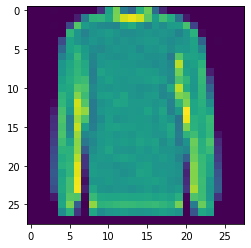

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 45

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

We can notice that all of the values in the number are between 0 and 255. While training a neural network especially in image processing, for various reasons it will usually learn better if we scale all values to between 0 and 1. It's a process called normalization and fortunately in Python, it's easy to normalize an array without looping.

In [ ]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [ ]:
# Build the classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

[Sequential](https://keras.io/api/models/sequential/): That defines a sequence of layers in the neural network.

[Flatten](https://keras.io/api/layers/reshaping_layers/flatten/): Remember earlier where our images were a 28x28 pixel matrix. Flatten just takes that square and turns it into a 1-dimensional array.

[Dense](https://keras.io/api/layers/core_layers/dense/): Adds a layer of neurons.

Each layer of neurons need an [activation function](https://keras.io/api/layers/activations/) to tell them what to do. There are a lot of options, but just use these for now: 

[ReLU](https://keras.io/api/layers/activations/#relu-function) effectively means:

```
if x > 0: 
  return x

else: 
  return 0
```

In other words, it only passes values 0 or greater to the next layer in the network.
[Softmax](https://keras.io/api/layers/activations/#softmax-function) takes a list of values and scales these so the sum of all elements will be equal to 1. When applied to model outputs, we can think of the scaled values as the probability for that class. For example, in your classification model which has 10 units in the output dense layer, having the highest value at `index = 4` means that the model is most confident that the input clothing image is a coat. If it is at index = 5, then it is a sandal, and so forth. See the short code block below which demonstrates these concepts. We can also watch this [lecture](https://www.youtube.com/watch?v=LLux1SW--oM&ab_channel=DeepLearningAI) if you want to know more about the Softmax function and how the values are computed.                   

In [ ]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


Compiling it with an optimizer and loss function as before -- and then training it by calling model.fit() asking it to fit training data to the training labels. It will figure out the relationship between the training data and its actual labels so in the future if we have inputs that looks like the training data, then it can predict what the label for that input is.

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4972 - accuracy: 0.8261
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3751 - accuracy: 0.8648
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3364 - accuracy: 0.8775
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3143 - accuracy: 0.8841
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2943 - accuracy: 0.8913


Neural network is about 89% accurate in classifying the training data. That is, it figured out a pattern match between the image and the labels that worked 89% of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly.

In [ ]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3739 - accuracy: 0.8654


[0.37390434741973877, 0.8654000163078308]

the accuracy here to be about 0.86 which means it was 86% accurate on the entire test set. 

# Exploration Exercises

### Exercise 1:
The below code creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after running it is a list of numbers. Why do you think this is, and what do those numbers represent? 

In [ ]:
classifications = model.predict(test_images)

print(classifications[0])

[1.3648841e-07 2.7520060e-09 2.6731021e-08 1.0108975e-09 3.7522054e-07 6.8230554e-03 2.4014483e-07 8.6046597e-03 8.9978080e-08 9.8457134e-01]


In [ ]:
print(test_labels[0])

9


### E1Q1: What does this list represent?
The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value (https://github.com/zalandoresearch/fashion-mnist#labels), i.e. the first value in the list is the probability that the image is of a '0' (T-shirt/top), the next is a '1' (Trouser) etc. Notice that they are all VERY LOW probabilities.

For index 9 (Ankle boot), the probability was in the 90's, i.e. the neural network is telling us that the image is most likely an ankle boot.

### E1Q2: How do you know that this list tells you that the item is an ankle boot?

Both the list and the labels are 0 based, so the ankle boot having label 9 means that it is the 10th of the 10 classes. The list having the 10th element being the highest value means that the Neural Network has predicted that the item it is classifying is most likely an ankle boot

### Exercise 2: 
Let's now look at the layers in the model. Experiment with different values for the dense layer with 512 neurons. What different results do we get for loss, training time etc? 

In [ ]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu), # Try experimenting with this layer
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1862
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0745
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0490
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0356
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0705
[1.4921146e-10 1.5671819e-08 3.3089773e-08 6.2468160e-07 2.5770176e-13
 4.4986011e-11 1.2760216e-15 9.9999940e-01 1.4562576e-10 3.1623784e-08]
7


### E2Q1: Increase to 1024 Neurons -- What's the impact?

By adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate. That doesn't mean it's always a case of 'more is better', we can hit the law of diminishing returns very quickly!

### Exercise 3: 

### E3Q1: What would happen if we remove the Flatten() layer. 
An error occurs about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in the network should be the same shape as the data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of writng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.




In [ ]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), #Try removing this layer
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)]) # Try experimenting with this layer

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5


ValueError: ignored

### Exercise 4: 

Consider the final (output) layers. Why are there 10 of them? What would happen if we had a different amount than 10? For example, try training the network with 5.

We get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.


### Exercise 5: 

Consider the effects of additional layers in the network. What will happen if we add another layer between the one with 512 and the final layer with 10. 

There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary. 

### Exercise 6: 

### E6Q1: Consider the impact of training for more or less epochs. 

- Try 15 epochs -- we'll probably get a model with a much better loss than the one with 5
- Try 30 epochs -- we might see the loss value stops decreasing, and sometimes increases.

This is a side effect of something called 'overfitting'. There's no point in wasting your time training if we aren't improving the loss.

### Exercise 7: 

Before we trained, we normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Why do you think you get different results? 

In [ ]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
#training_images=training_images/255.0 # Experiment with removing this line
#test_images=test_images/255.0 # Experiment with removing this line
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 2.7492
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3275
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2907
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2555
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3494
[1.33081665e-31 2.47818039e-14 5.56337847e-15 2.82976701e-17
 1.17670291e-14 6.13000945e-26 1.33204418e-26 1.00000000e+00
 1.09773584e-16 1.83766358e-09]
7


# Using Callbacks to Control Training

In this lab, you will use the [Callbacks API](https://keras.io/api/callbacks/) to stop training when a specified metric is met. This is a useful feature so we won't need to complete all epochs when this threshold is reached. For example, if you set 1000 epochs and your desired accuracy is already reached at epoch 200, then the training will automatically stop. 

In [ ]:
import tensorflow as tf

# Instantiate the dataset API
fmnist = tf.keras.datasets.fashion_mnist

# Load the dataset
(x_train, y_train),(x_test, y_test) = fmnist.load_data()

# Normalize the pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

4431872/4422102 [==============================] - 0s 0us/step


## Creating a Callback class

You can create a callback by defining a class that inherits the [tf.keras.callbacks.Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback) base class. From there, we can define available methods to set where the callback will be executed. For instance below, we will use the [on_epoch_end()](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback#on_epoch_end) method to check the loss at each training epoch.

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training after reaching 60 percent accuracy

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check accuracy
    if(logs.get('loss') < 0.4):

      # Stop if threshold is met
      print("\nLoss is lower than 0.4 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [ ]:
# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


#### Train the model
To set the callback, simply set the `callbacks` parameter to the `myCallback` instance we declared before. Run the cell below and observe what happens.

In [ ]:
# Train the model with a callback
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4710 - accuracy: 0.8310
Epoch 2/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.3576 - accuracy: 0.8697
Loss is lower than 0.4 so cancelling training!
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3574 - accuracy: 0.8698


You will notice that the training does not need to complete all 10 epochs. By having a callback at each end of the epoch, it is able to check the training parameters and compare if it meets the threshold we set in the function definition. In this case, it will simply stop when the loss falls below `0.40` after the current epoch.

*Optional Challenge: Modify the code to make the training stop when the accuracy metric exceeds 60%.*